In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Full path to the file
file_path = r"C:\Users\Kaleb\Downloads\Technical Content-20250612T081638Z-1-001\MachineLearningRating_v3\MachineLearningRating_v3.txt"

# Read the file using pandas with pipe ('|') as the delimiter
df = pd.read_csv(file_path, sep='|')


C:\Users\Kaleb\AppData\Local\Temp\ipykernel_12060\3579379550.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


In [ ]:
print("Shape:", df.shape)
df.head()


Shape: (1000098, 53)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.0


In [33]:
df.describe(include='all')  # for both numeric and categorical
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [4]:
df.info()
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
WrittenOff                  641901
Converted                   641901
Rebuilt                     641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
mmcode                         552
VehicleType                    552
make                           552
VehicleIntroDate               552
NumberOfDoors                  552
bodytype                       552
kilowatts                      552
cubiccapacity                  552
Cylinders                      552
Model                          552
CapitalOutstanding               2
dtype: int64

In [30]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({"MissingCount": missing, "PercentMissing": missing_percent})
missing_summary = missing_summary[missing_summary["MissingCount"] > 0].sort_values(by="MissingCount", ascending=False)
print(missing_summary)


                         MissingCount  PercentMissing
NumberOfVehiclesInFleet       1000098      100.000000
CrossBorder                    999400       99.930207
CustomValueEstimate            779642       77.956560
WrittenOff                     641901       64.183810
Converted                      641901       64.183810
Rebuilt                        641901       64.183810
NewVehicle                     153295       15.327998
Bank                           145961       14.594670
AccountType                     40232        4.022806
Gender                           9536        0.953507
MaritalStatus                    8259        0.825819
mmcode                            552        0.055195
VehicleType                       552        0.055195
make                              552        0.055195
VehicleIntroDate                  552        0.055195
NumberOfDoors                     552        0.055195
bodytype                          552        0.055195
kilowatts                   

In [36]:
# Summary stats for numeric columns
print(df.describe())

# Calculate standard deviation and variance
print(df[['TotalPremium', 'TotalClaims']].agg(['mean', 'std', 'var']))


       UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear      Cylinders  \
count  1.000098e+06  9.995460e+05      1.000098e+06  999546.000000   
mean   3.020601e+03  5.487770e+07      2.010225e+03       4.046642   
min    1.000000e+00  4.041200e+06      1.987000e+03       0.000000   
25%    8.270000e+02  6.005692e+07      2.008

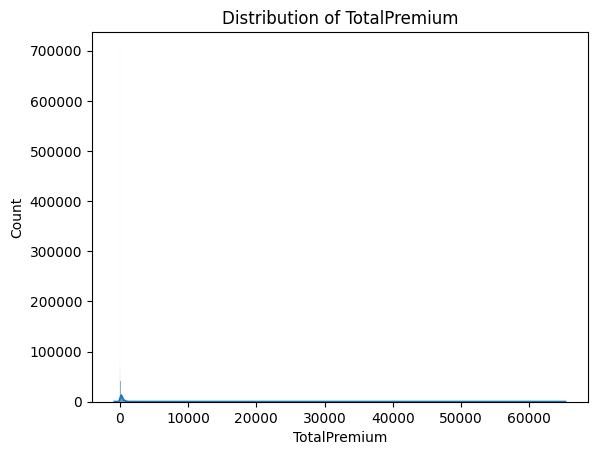

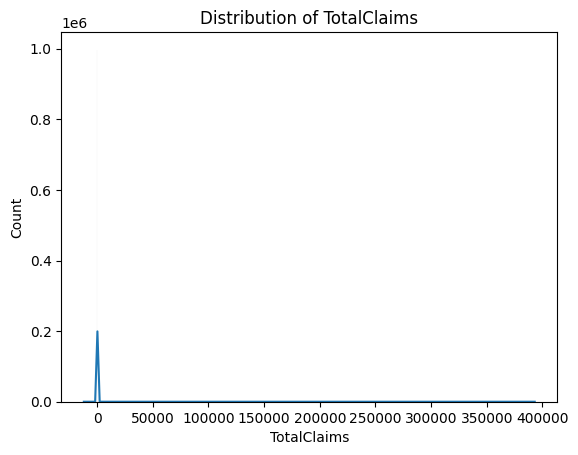

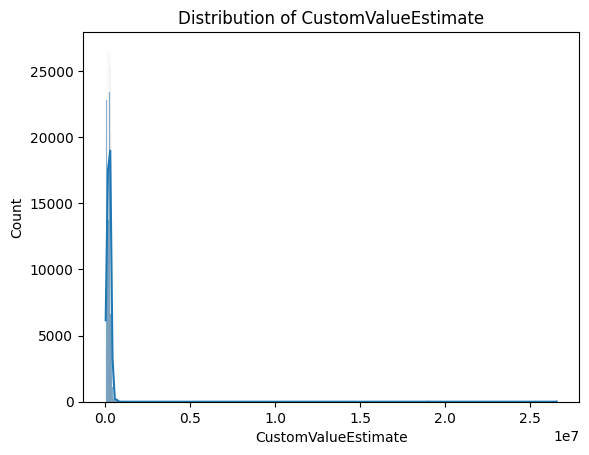

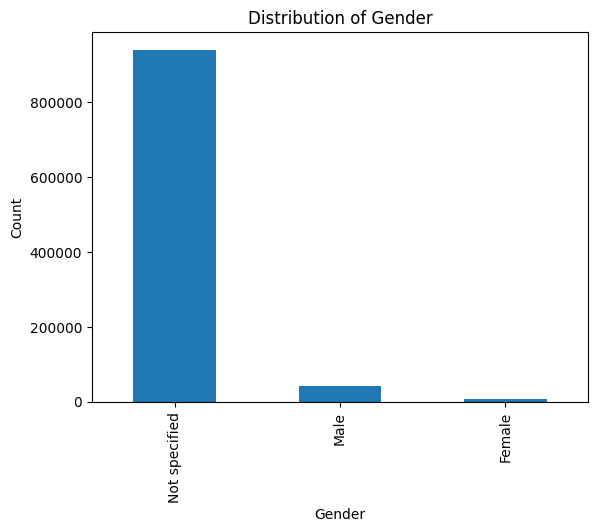

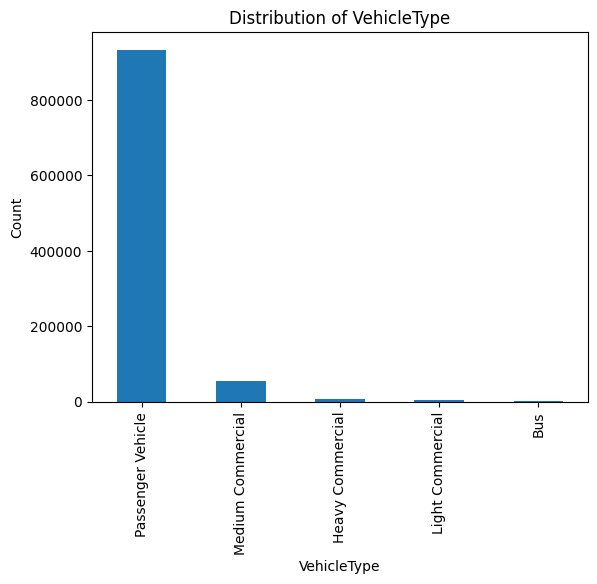

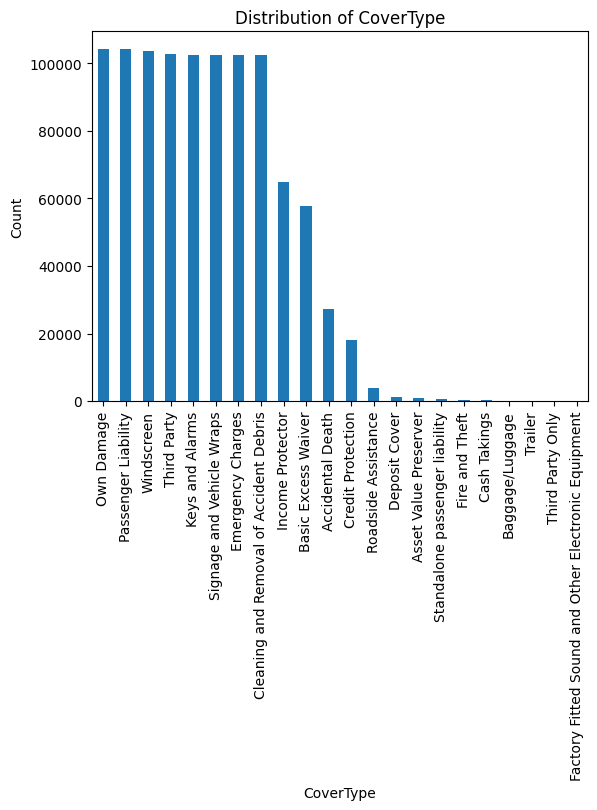

In [ ]:
# Histograms for numeric variables
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar charts for categorical
for col in ['Gender', 'VehicleType', 'CoverType']:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.show()


In [8]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
# Avoid division by zero
df['LossRatio'] = df['LossRatio'].replace([float('inf'), -float('inf')], 0).fillna(0)

print(f"Overall Portfolio Loss Ratio: {df['LossRatio'].mean():.4f}")


Overall Portfolio Loss Ratio: 0.2164


In [13]:
# By Province
print(df.groupby('Province')['LossRatio'].mean().sort_values())




Province
Free State       0.077792
Northern Cape    0.116388
Eastern Cape     0.152974
KwaZulu-Natal    0.174868
North West       0.178830
Western Cape     0.193640
Mpumalanga       0.235858
Limpopo          0.252857
Gauteng          0.262216
Name: LossRatio, dtype: float64


In [14]:
# By VehicleType
print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())



VehicleType
Bus                  0.000000
Passenger Vehicle    0.208682
Medium Commercial    0.305509
Light Commercial     0.364845
Heavy Commercial     0.457233
Name: LossRatio, dtype: float64


In [15]:
# By Gender
print(df.groupby('Gender')['LossRatio'].mean().sort_values())

Gender
Male             0.157443
Not specified    0.218548
Female           0.247919
Name: LossRatio, dtype: float64


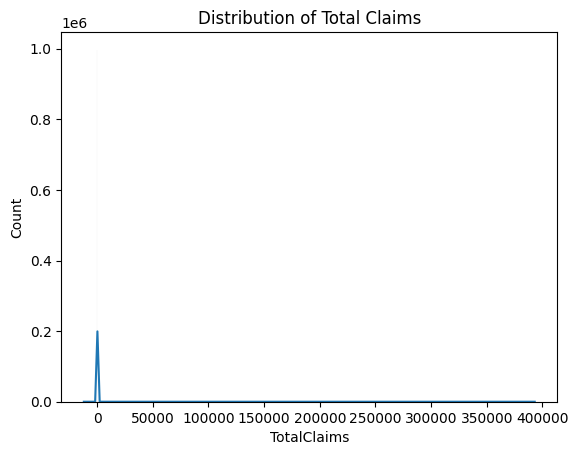

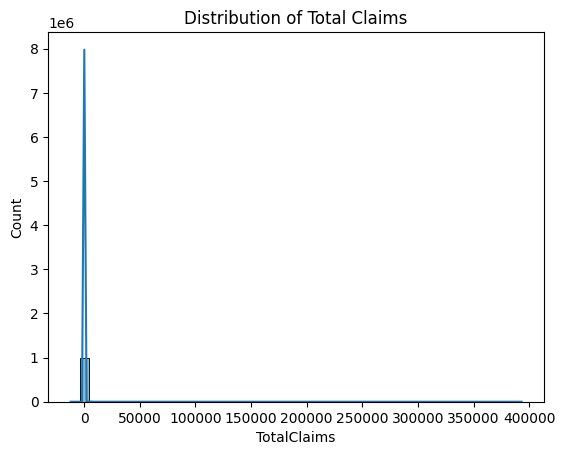

In [18]:
# Claims
sns.histplot(df['TotalClaims'], kde=True)
plt.title('Distribution of Total Claims')
plt.show()

sns.histplot(df["TotalClaims"], bins=50, kde=True)
plt.title("Distribution of Total Claims")
plt.show()

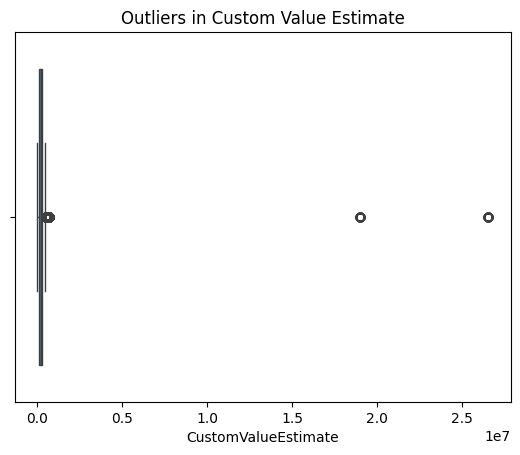

In [19]:
# CustomValueEstimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Outliers in Custom Value Estimate')
plt.show()

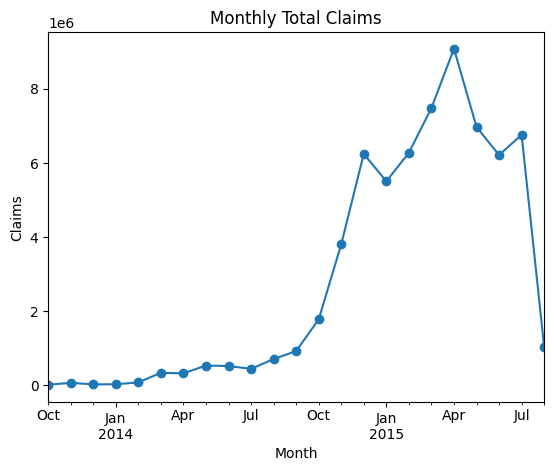

In [21]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Claims per month
monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()

monthly_claims.plot(kind='line', marker='o', title='Monthly Total Claims')
plt.xlabel('Month')
plt.ylabel('Claims')
plt.show()


In [22]:
# Top Makes by Average Claim
top_makes = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
print("Top 10 makes by average claim amount:")
print(top_makes.head(10))

# Bottom 10
print("Bottom 10 makes by average claim amount:")
print(top_makes.tail(10))


Top 10 makes by average claim amount:
make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
POLARSUN                               134.044800
B.A.W                                  132.934016
FIAT                                   108.625642
BMW                                     90.558050
IVECO                                   89.667017
Name: TotalClaims, dtype: float64
Bottom 10 makes by average claim amount:
make
HINO                                   0.0
JINBEI                                 0.0
LEXUS                                  0.0
PROTON                                 0.0
PEUGEOT                                0.0
OPEL                                   0.0
RENAULT                                0.0
SCANIA                                 0.0
TATA                             

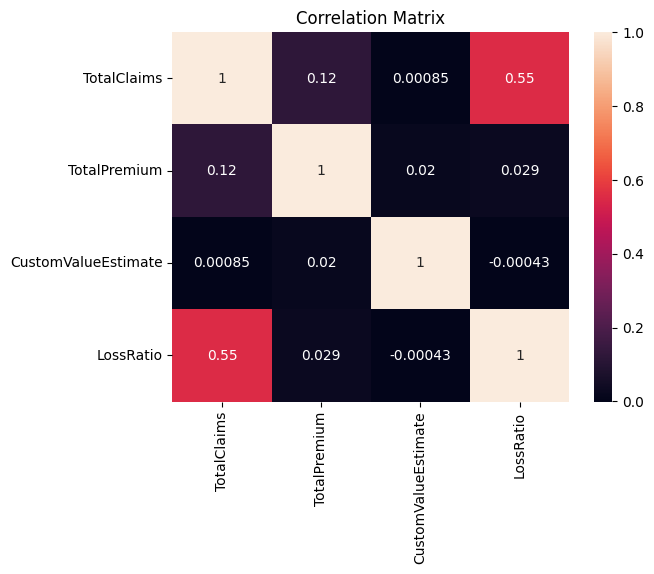

In [23]:
# Correlation
corr = df[['TotalClaims', 'TotalPremium', 'CustomValueEstimate', 'LossRatio']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [24]:

# Describe CustomValueEstimate
print(df['CustomValueEstimate'].describe())




count    2.204560e+05
mean     2.255311e+05
std      5.645157e+05
min      2.000000e+04
25%      1.350000e+05
50%      2.200000e+05
75%      2.800000e+05
max      2.655000e+07
Name: CustomValueEstimate, dtype: float64


Values used in plot: 220456
count    2.204560e+05
mean     2.255311e+05
std      5.645157e+05
min      2.000000e+04
25%      1.350000e+05
50%      2.200000e+05
75%      2.800000e+05
max      2.655000e+07
Name: CustomValueEstimate, dtype: float64


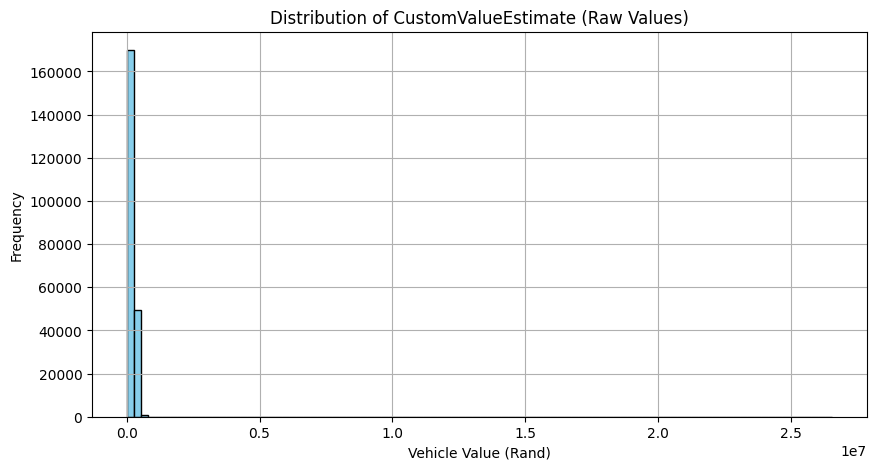

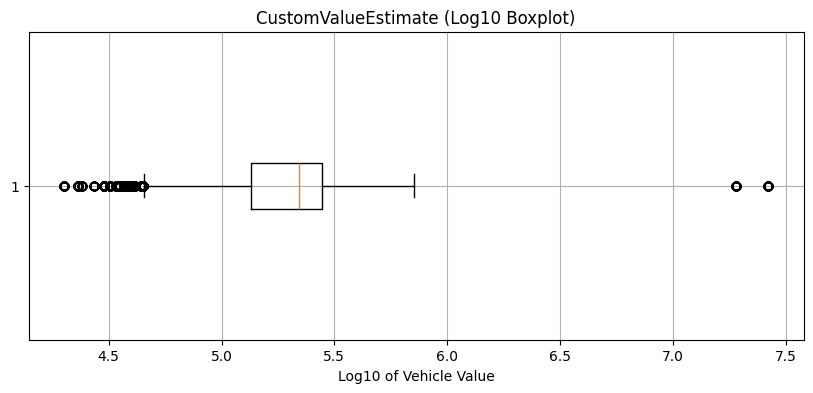

In [29]:
import numpy as np
# Convert to numeric (in case of text/strings)
df['CustomValueEstimate'] = pd.to_numeric(df['CustomValueEstimate'], errors='coerce')

# Keep only positive, non-null values
subset = df[df['CustomValueEstimate'] > 0]['CustomValueEstimate']

# Show how many values remain
print("Values used in plot:", len(subset))
print(subset.describe())

# Optional: Histogram
plt.figure(figsize=(10,5))
plt.hist(subset, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of CustomValueEstimate (Raw Values)")
plt.xlabel("Vehicle Value (Rand)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Optional: Boxplot (log scale to make it readable)
plt.figure(figsize=(10, 4))
plt.boxplot(np.log10(subset), vert=False)
plt.title("CustomValueEstimate (Log10 Boxplot)")
plt.xlabel("Log10 of Vehicle Value")
plt.grid(True)
plt.show()